# Introduction

In this project we'll try to predict car prices. In order to do so, we'll use **K neighbors algorithm**. We'll first modelize using a univariate regressor and see for which feature the model shows the lowest error.

After that, we'll select the features that show the highest correlation with the price and train the model using different numbers of features among the one we chose.

The point of the project is to show the workflow of which is considered to be (matematically) the easiest algorithm but also the most demanding for the "machine" in terms of performance.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols, na_values='?')

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
cars.shape

(205, 26)

We'll now check for missing values. Machine learning algorithms cannot be trained if they have to deal with missing data.

In [5]:
cars.isnull().sum(axis=0) / len(cars) * 100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-rate      0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

We see that the ```normalized-losses``` column has **20 %** of missing data; we'll fill them with the average value.
For the other columns, we see that they have a very low percentage of null values (between **0.97 %** and **1.95 %**). We'll just drop those rows.

In [6]:
# filling 'normalized-losses' null values

mask = cars['normalized-losses'].isnull()

cars.loc[mask] = cars.loc[mask].fillna(cars['normalized-losses'].mean())

In [7]:
# dropping remaining rows

cars.dropna(axis=0, inplace=True)

In [8]:
cars.shape

(200, 26)

In [9]:
# reset indexing

cars.reset_index(inplace=True)

At the end we just cancelled 5 rows. That's a good tradeoff.

We'll now select every numeric column and see how the distribution of the values behave to check if we have to normalize something

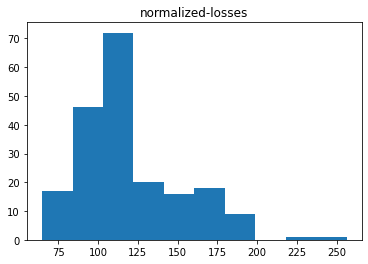

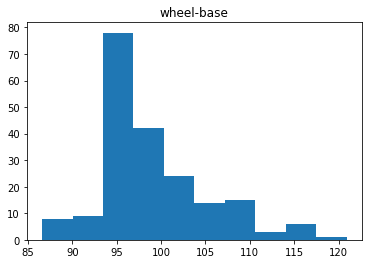

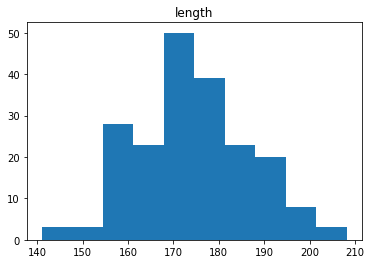

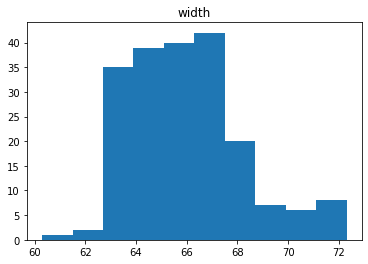

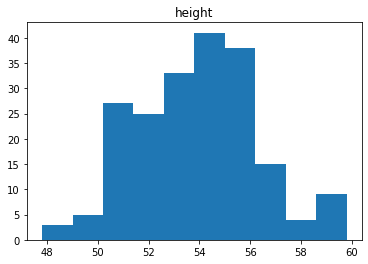

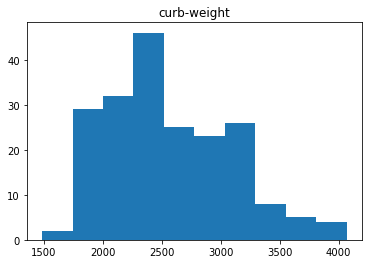

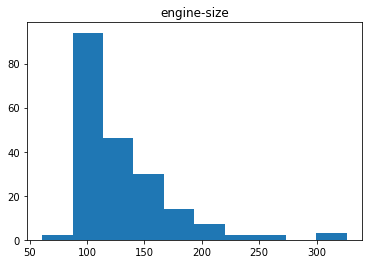

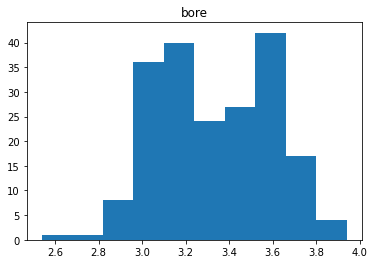

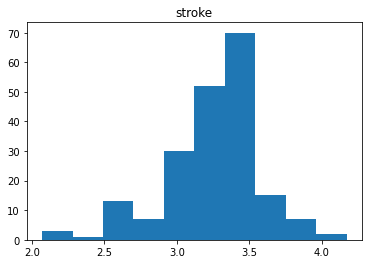

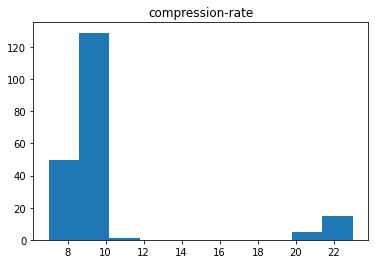

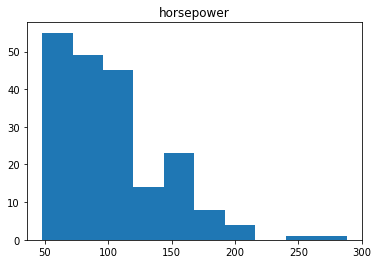

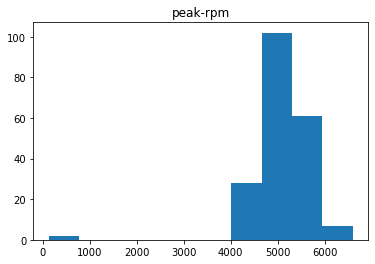

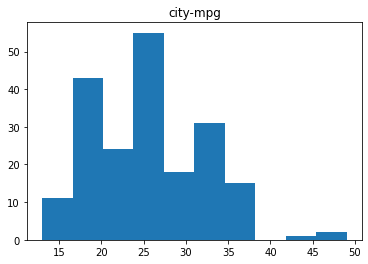

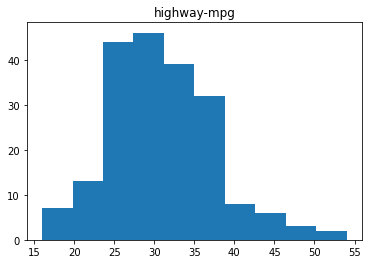

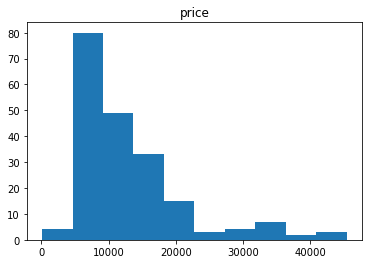

In [10]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width',
                'height', 'curb-weight', 'engine-size', 'bore',
                'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
                'city-mpg', 'highway-mpg', 'price']

for col in cars[numeric_cols]:
    plt.hist(cars[col])
    plt.title(col)
    plt.show()

Every numeric column shows a different range of values; for this reason we'll have to normalize the entire dataset by using:

For each value, we'll subtract the mean of the distribution and divide for the difference of the maximum value minus the minimum one. But before we want also to see any correlation among the numeric columns and prices.

In [11]:
for col in cars[numeric_cols]:
    correlation = cars[col].corr(cars['price'])
    print(f"Among {col} and prices: {correlation}")
    print("-------------------------------------------------") # delimiter

Among normalized-losses and prices: 0.13411745626721647
-------------------------------------------------
Among wheel-base and prices: 0.5804526437423556
-------------------------------------------------
Among length and prices: 0.6867187324230176
-------------------------------------------------
Among width and prices: 0.6960664035623969
-------------------------------------------------
Among height and prices: 0.16055815372143067
-------------------------------------------------
Among curb-weight and prices: 0.8005805775766383
-------------------------------------------------
Among engine-size and prices: 0.8533262621986676
-------------------------------------------------
Among bore and prices: 0.5234854290013278
-------------------------------------------------
Among stroke and prices: 0.08868283998541977
-------------------------------------------------
Among compression-rate and prices: 0.07641866331623785
-------------------------------------------------
Among horsepower and pri

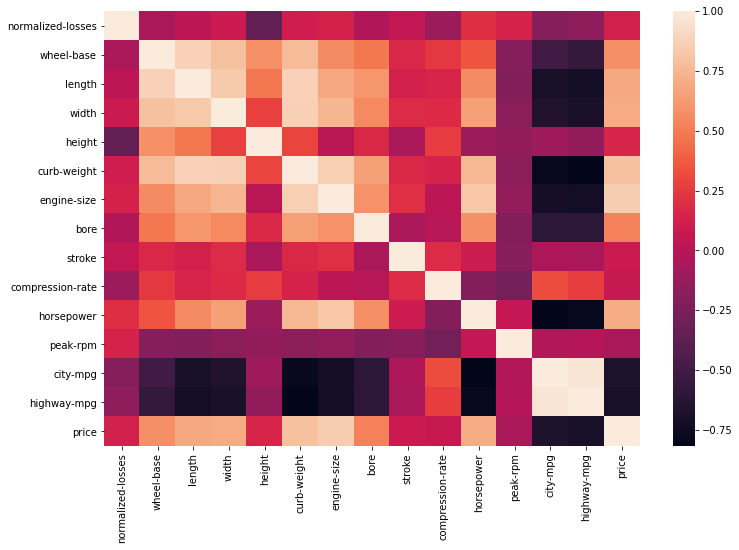

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(cars[numeric_cols].corr())
plt.show()

After a brief exploration we can say that there are some feature that direcly correlate with the price:
* ```engine-size``` with 0.8533262621986676
* ```curb-weight``` with 0.8005805775766383
* ```horsepower``` with 0.7020382468349784
* ```width``` with 0.6960664035623969
* ```lenght``` with 0.6867187324230176

Or even negatively correlated like:
* ```highway-mpg``` with -0.6977878581858736
* ```city-mpg``` with -0.6726310525326126

Knowing this we can decide more precisily which feature to use when we'll train our machine learning algorithm.

By know we'll normalize the values of the dataframe excluding the price column that is our target we want to predict.

In [13]:
# normalization except price column

price_col = cars['price']

norm_cars = (cars[numeric_cols] - cars[numeric_cols].mean()) / (cars[numeric_cols].max() - cars[numeric_cols].min())

norm_cars['price'] = price_col

We want to shuffle a little bit the dataset and split it into a **train set** and a **test set**. We will use **75 %** of the dataset as a train set and the remaining **25 %** to test our algorithm.

In [14]:
# shuffling

np.random.seed(42)
shuffled = np.random.permutation(len(norm_cars))
norm_cars = norm_cars.iloc[shuffled]

# splitting the data

train_set = norm_cars.head(int(len(norm_cars) * 0.75)).copy()
test_set = norm_cars.iloc[len(train_set):].copy()

In [15]:
train_set

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
95,-0.080157,-0.048134,-0.012448,-0.060208,0.073083,-0.100184,-0.030717,-0.000893,0.102500,-0.104381,-0.030583,0.022234,0.044583,0.081316,9549.0
15,0.003613,0.135539,0.220388,0.081458,0.156417,0.259785,0.305132,0.206250,0.064405,-0.135631,0.323583,0.053107,-0.260972,-0.234474,30760.0
30,0.082147,-0.357172,-0.442299,-0.168542,-0.251917,-0.287539,-0.136377,-0.300893,0.073929,-0.060631,-0.118083,0.145729,0.155694,0.186579,6855.0
158,0.244450,-0.126851,-0.082597,-0.160208,-0.101917,-0.151775,-0.113736,-0.100893,-0.107024,-0.073131,-0.143083,-0.039514,0.100139,0.081316,8058.0
128,-0.090628,0.007259,0.184567,0.048125,0.189750,0.052260,-0.026943,0.149107,-0.087976,-0.054381,0.023583,0.029952,-0.122083,-0.076579,12170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,-0.059215,-0.068542,-0.161701,-0.160208,0.056417,-0.213450,-0.136377,-0.300893,0.073929,-0.060631,-0.118083,0.145729,0.127917,0.081316,7295.0
7,0.003613,0.202595,0.275612,0.456458,0.156417,0.152725,0.029660,-0.100893,0.069167,-0.104381,0.023583,0.068544,-0.177639,-0.155526,18920.0
110,0.207801,0.263819,0.186060,0.206458,0.239750,0.199661,-0.030717,0.091964,-0.030833,-0.110631,-0.030583,-0.008640,-0.177639,-0.181842,16630.0
91,0.003613,-0.126851,-0.133343,-0.176875,0.056417,-0.228578,-0.117509,-0.129464,0.016786,-0.048131,-0.147250,0.022234,0.155694,0.160263,7499.0


At this point we can start training our machine learning algorithm. We'll just start with some univariate k-nearest neighbors models.
We'll use just one feature at a time and see how it behaves. Using the feature that are mostly correlated with prices should help us in predicting prices in the test set.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, train_df, test_df):
    
    model = KNeighborsRegressor()
    
    model.fit(train_df[[training_col]], train_df[target_col])
    test_df['predicted_price'] = model.predict(test_df[[training_col]])
    
    
    # calculate mse and rmse
    
    mse = mean_squared_error(test_df['price'], test_df['predicted_price'])
    rmse = np.sqrt(mse)
    
    print(f"For the feature {training_col},\nthe algorithm shows a margin of error of {rmse} $")

We wrote the function; now we'll try it with the column ```engine-size``` (the feature that has the highest correlation score) and see which value we obtained.

In [17]:
# testing 

knn_train_test('engine-size', 'price', train_set, test_set)

For the feature engine-size,
the algorithm shows a margin of error of 3882.28988201551 $


So by fitting our model with the ```engine-size``` it shows that margin of error. We still don't know if this value is too high. We'll have to train the algorithm using other features.

In [18]:
# features to use

features = ['engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'highway-mpg', 'city-mpg']

for feature in features:
    
    knn_train_test(feature, 'price', train_set, test_set)
    print("------------------------------------------------") # delimiter

For the feature engine-size,
the algorithm shows a margin of error of 3882.28988201551 $
------------------------------------------------
For the feature curb-weight,
the algorithm shows a margin of error of 4802.830219610099 $
------------------------------------------------
For the feature horsepower,
the algorithm shows a margin of error of 3538.3543906171976 $
------------------------------------------------
For the feature width,
the algorithm shows a margin of error of 3892.5501715970213 $
------------------------------------------------
For the feature length,
the algorithm shows a margin of error of 4313.937404460106 $
------------------------------------------------
For the feature highway-mpg,
the algorithm shows a margin of error of 3965.4861121431254 $
------------------------------------------------
For the feature city-mpg,
the algorithm shows a margin of error of 4057.769216995959 $
------------------------------------------------


By iterating the model with each feature we chose, we can see that it better behaves when we use ```horsepower``` to fit our model.
The error is the lowest one with **3538 $**.

Now we want to train our algorithm by using different ```k``` values. We know that this algorithm predict the target value by using the ```n``` neighbors same target value.

We'll train it with ```k = [1, 3, 5, 7, 9]``` and still use a univariate method.

In [19]:
# modify knn_train_test function

def knn_train_test(training_col, target_col, train_df, test_df, k_value):
    
    model = KNeighborsRegressor(n_neighbors=k_value)
    
    model.fit(train_df[[training_col]], train_df[target_col])
    test_df['predicted_price'] = model.predict(test_df[[training_col]])
    
    
    # calculate mse and rmse
    
    mse = mean_squared_error(test_df['price'], test_df['predicted_price'])
    rmse = np.sqrt(mse)
    
    return rmse

Modified the function, we'll iterate for each feature and for each k value. At the end we'll plot a scatter graph and see how the **root mean squared error** behave.

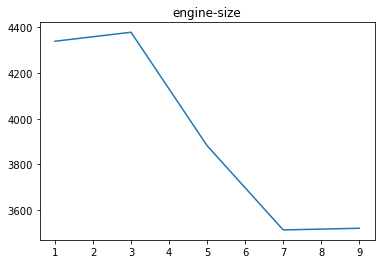

Lowest rmse: 3514.0317860641767


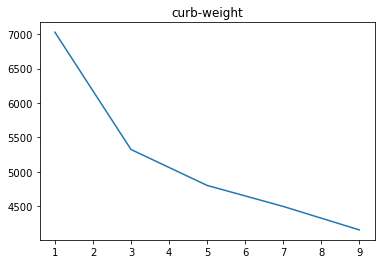

Lowest rmse: 4156.220901905011


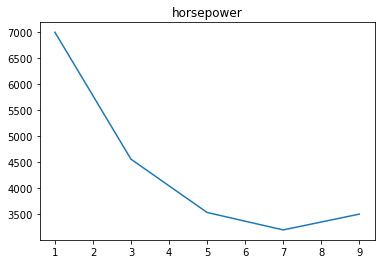

Lowest rmse: 3203.855149595848


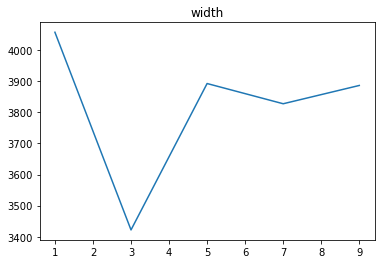

Lowest rmse: 3421.905333452565


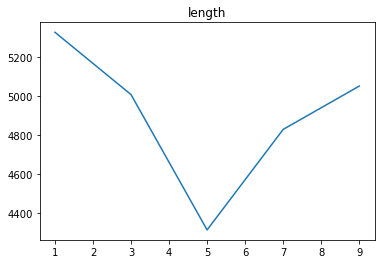

Lowest rmse: 4313.937404460106


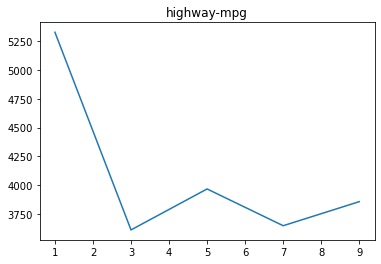

Lowest rmse: 3609.231702484924


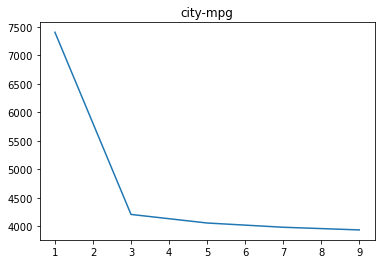

Lowest rmse: 3936.407461908998


In [20]:
k_values = [1, 3, 5, 7, 9]

for feature in features:
    
    rmses = []
    
    for k in k_values:
        
        rmse = knn_train_test(feature, 'price', train_set, test_set, k)
        rmses.append(rmse)
    
    plt.plot(k_values, rmses)
    plt.title(feature)
    plt.show()
    print(f"Lowest rmse: {min(rmses)}")

We can see how by setting a different number of ```k``` the margin of error mainly decrease; and we can find out that, if we decide to use a univariate model, the best performance is obtained with the ```horsepower``` feature and a k value of 7 showing a **RMSE** of roughly **3204 $**.

## Multivariate K-Nearest Model:

Until now we trained our model with just one feature. It is always better to use more than just one feature to predict prices; so we have to slightly modify our previous function so that, instead of working with a single column, we can use all the columns we passed in. We'll limit, for the moment, ourselves by using the default k value (5). We'll tune it later.

We'll start by training with the best two features and so on and so forth.

In [21]:
def knn_train_test(training_cols, target_col, train_df, test_df):
    
    model = KNeighborsRegressor()
    
    model.fit(train_df[training_cols], train_df[target_col])
    test_df['predicted_price'] = model.predict(test_df[training_cols])
    
    
    # calculate mse and rmse
    
    mse = mean_squared_error(test_df['price'], test_df['predicted_price'])
    rmse = np.sqrt(mse)
    
    return rmse

In [22]:
sorted_features = ['horsepower', 'engine-size', 'width', 'highway-mpg',
                  'city-mpg', 'length', 'curb-weight']


ind = 2
rmses = {}
for i in range(len(sorted_features) - 1):
    
    rmse = knn_train_test(sorted_features[:ind], 'price', train_set, test_set)
    
    rmses[str(ind) + ' best features'] = rmse
    
    ind += 1
    
rmses

{'2 best features': 3538.839738897482,
 '3 best features': 3153.186270552376,
 '4 best features': 3038.111611906317,
 '5 best features': 3094.195737699863,
 '6 best features': 3223.947785805471,
 '7 best features': 3064.3997309750566}

Let's now tune the hypeparameter values and see what happens.

In [23]:
# modify the funtion

def knn_train_test(training_cols, target_col, train_df, test_df, k_value):
    
    model = KNeighborsRegressor(n_neighbors=k_value)
    
    model.fit(train_df[training_cols], train_df[target_col])
    test_df['predicted_price'] = model.predict(test_df[training_cols])
    
    
    # calculate mse and rmse
    
    mse = mean_squared_error(test_df['price'], test_df['predicted_price'])
    rmse = np.sqrt(mse)
    
    return rmse

In [24]:
hps = list(range(1, 26))

k_rmses = {}


for i in range(2, 8):
    
    hp_dict = {}
    
    for hp in hps:
        rmse = knn_train_test(sorted_features[:i], 'price', 
                              train_set, test_set,
                              hp)
        hp_dict[hp] = rmse

    k_rmses[str(i) + ' best features'] = hp_dict

In [25]:
k_rmses

{'2 best features': {1: 4047.1475881168453,
  2: 3455.0099189437938,
  3: 3381.344112430243,
  4: 3247.993176370603,
  5: 3538.839738897482,
  6: 3669.2234148840453,
  7: 3685.277694961343,
  8: 3558.014884999078,
  9: 3558.6061117060435,
  10: 3661.7724361298037,
  11: 3802.5220117380077,
  12: 3915.521979925253,
  13: 3950.1798582226215,
  14: 3913.878290722878,
  15: 3912.2466317733883,
  16: 3918.707049076822,
  17: 3990.4111175143353,
  18: 4138.7790261108785,
  19: 4225.310261984048,
  20: 4319.374884702646,
  21: 4349.726305899698,
  22: 4391.687338522501,
  23: 4399.035919707107,
  24: 4481.562678480112,
  25: 4487.0045200209015},
 '3 best features': {1: 4008.5208144651065,
  2: 3540.9902520340265,
  3: 3021.95321163868,
  4: 2979.116545009611,
  5: 3153.186270552376,
  6: 3311.7580941917304,
  7: 3346.470307652527,
  8: 3224.447947178323,
  9: 3293.6160537292008,
  10: 3411.3944155139848,
  11: 3492.461465419199,
  12: 3620.529712241321,
  13: 3703.336456182763,
  14: 3728.959

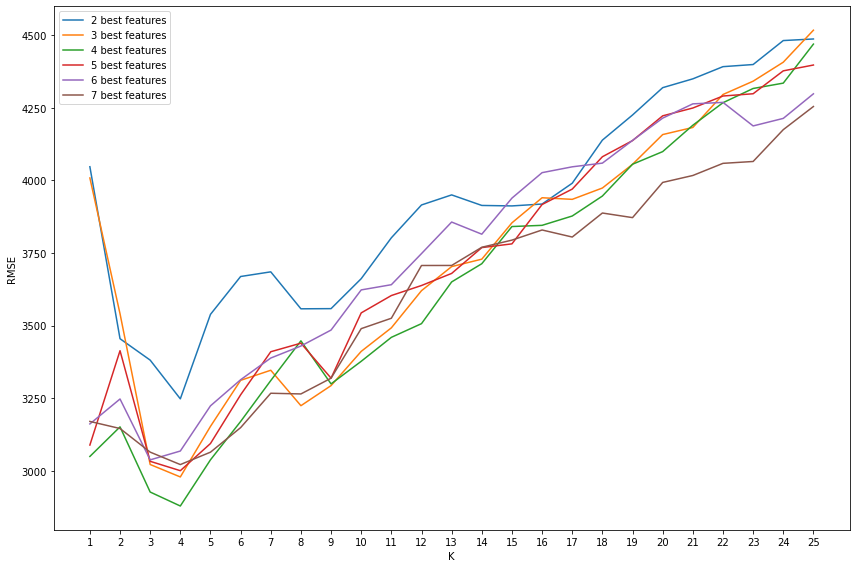

In [26]:
plt.figure(figsize=(12,8))

for k, v in k_rmses.items():
    x_values = list(v.keys())
    y_values = list(v.values())
    plt.plot(x_values, y_values, label=f"{k}")

    

plt.legend()
plt.xticks(list(range(1,26)))
plt.xlabel('K')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


In [27]:
for k, v in k_rmses.items():
    print(f"{k}:\nlowest RMSE: {min(v.values())}")

2 best features:
lowest RMSE: 3247.993176370603
3 best features:
lowest RMSE: 2979.116545009611
4 best features:
lowest RMSE: 2879.076875276171
5 best features:
lowest RMSE: 3000.6696948348044
6 best features:
lowest RMSE: 3037.8961426180012
7 best features:
lowest RMSE: 3021.769431765104


After using various ```k values``` and training the model with different numbers of features, we can say that the best results in terms of **RMSE** are obtained with **4 features** and a ```k``` equal to 4.

In this case, in fact, we score the lowest **RMSE** (2879 $)

## K-fold cross validation

What we want to do now is modify the ```knn_train_test``` function by using K-fold cross validation. The dataset will be split into ```k``` parts; the algorithm will be trained on ```k - 1``` parts of the dataset and then tested on the remaining part. This process will be repeated until each partition has been used as a test set.

In [28]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(training_cols, target_col, df, n_splits=5, k_values=5):
    
    # instatiating an instance of the KFold
    
    kf = KFold(n_splits)
    
    # instatiating ML model
    
    model = KNeighborsRegressor(k_values)
    
    # cross validation
    
    rmses = np.abs(cross_val_score(model, df[training_cols], df[target_col], 
                           scoring='neg_root_mean_squared_error', cv=kf)
                  )
    
    return np.mean(rmses), np.std(rmses)

We'll set some various k-fold values and see the results.

In [29]:
n_folds = [2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

k_fold_dict = {}

for i in n_folds:
    r = knn_train_test(sorted_features, 'price', norm_cars, n_splits=i)
    print(f"Fold: {i}\nMean: {r[0]}\nStd: {r[1]}")
    print("--------------------------------------------------------------------") # delimiter
    k_fold_dict[i] = {'Mean': r[0], 'Std': r[1]}

Fold: 2
Mean: 4275.813617259121
Std: 722.1706687906062
--------------------------------------------------------------------
Fold: 3
Mean: 4002.4710206957006
Std: 1251.4048195300609
--------------------------------------------------------------------
Fold: 5
Mean: 3913.9340443375854
Std: 1770.5324680375759
--------------------------------------------------------------------
Fold: 8
Mean: 3889.091060561006
Std: 1927.7167129182833
--------------------------------------------------------------------
Fold: 13
Mean: 3431.568215387835
Std: 1852.2484450260695
--------------------------------------------------------------------
Fold: 21
Mean: 3312.9240387505683
Std: 1998.58628453941
--------------------------------------------------------------------
Fold: 34
Mean: 3179.7506956499565
Std: 2487.523996633469
--------------------------------------------------------------------
Fold: 55
Mean: 2921.4073795867553
Std: 2655.9216434588234
----------------------------------------------------------------

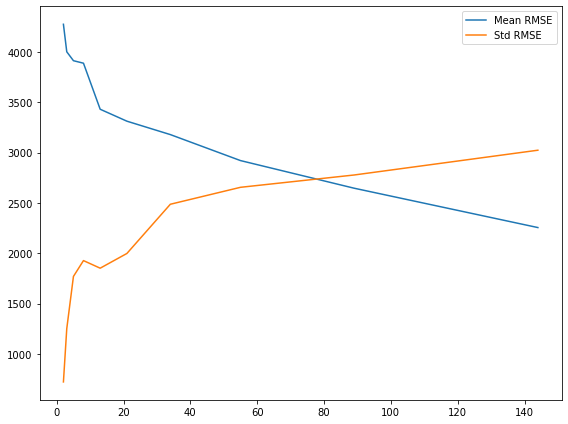

In [30]:
plt.figure(figsize=(8,6))

x_values = list()
mean_values = list()
std_values = list()

for k, v in k_fold_dict.items():
    
    x_values.append(k)
    mean_values.append(list(v.values())[0])
    std_values.append(list(v.values())[1])
    
plt.plot(x_values,
        mean_values,
        label='Mean RMSE')
plt.plot(x_values,
        std_values,
        label='Std RMSE')

plt.legend()
plt.tight_layout()
plt.show()

    

# Conclusion

In this project we trained a machine learning algorithm to predict car prices. We used **K-Nearest Model** and found out that, after calculating the correlations of each feature with the ```price``` column, the best model fitting is the one using **4 features** and a ```k-value``` of **4**. That model, in fact, returns the best output in terms of error (2879 $).

We then cross validated using ```KFold``` method and found out, as shown in the graph above, that the best tradeoff in terms of **bias** and **variance** is by splitting our dataset in roughly **80** folds.